In [25]:
import pandas as pd
from common.outliers import *
from common.clustering import *
from common.standardization import *

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [26]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2             2006   
10448                                    Deus Ex       PC             2000   
10449                  Monster Rancher Advance 2      GBA             2002   
10450                              Karnaaj Rally      GBA             2003   
10451                Wade Hixton's Counter Punch      GBA             2004   

              Genre  NA_Sales  EU_Sales  JP_Sales  Global_Sales

### Data stats for each column

In [27]:
columns_to_get_stats_from = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_to_get_stats_from})
print(columns_stats.to_string())

        Global_Sales  User_Score  Critic_Score   EU_Sales   NA_Sales   JP_Sales
max        82.530000    9.600000     99.000000  28.960000  41.360000  10.220000
min         0.010000    0.000000     13.000000   0.000000   0.000000   0.000000
std         1.904295    1.297881     12.566314   0.622661   1.002670   0.385861
mean        0.810365    7.270386     71.128760   0.225307   0.402908   0.108312
median      0.360000    7.500000     72.400000   0.070000   0.170000   0.000000


### Data standardization

In [28]:
columns_to_standardize = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
standardize(data, columns_to_standardize, columns_stats)
print(data)

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii             2006   
1                              Super Mario Bros.      NES             1985   
2                                 Mario Kart Wii      Wii             2008   
3                              Wii Sports Resort      Wii             2009   
4                       Pokemon Red/Pokemon Blue       GB             1996   
...                                          ...      ...              ...   
10447  Greg Hastings' Tournament Paintball Max'd      PS2             2006   
10448                                    Deus Ex       PC             2000   
10449                  Monster Rancher Advance 2      GBA             2002   
10450                              Karnaaj Rally      GBA             2003   
10451                Wade Hixton's Counter Punch      GBA             2004   

              Genre   NA_Sales   EU_Sales   JP_Sales  Global_Sa

### Outliers - 1D

Outliers according to column Global_Sales
Wii Sports: 42.91332813369049
Super Mario Bros.: 20.705634016604392
Mario Kart Wii: 18.22702639701001
Wii Sports Resort: 16.782922381356506
Nintendogs: 12.529379644340723
Pokemon Red/Pokemon Blue: 16.047742155205633
Tetris: 15.46484926161458
Pokemon Diamond/Pokemon Pearl: 9.158053178705993
Super Mario Bros. 3: 8.648678307730028
New Super Mario Bros.: 15.22329004445072
Super Mario Land: 9.100289018079852
Kinect Adventures!: 11.027511468061078
Wii Fit Plus: 11.017008893401778
Brain Age: Train Your Brain in Minutes a Day: 10.155797771339323
Wii Play: 14.761176759441597
Duck Hunt: 14.440848232333002
New Super Mario Bros. Wii: 14.44609951966265
Mario Kart DS: 11.762691694211954
Wii Fit: 11.49487604039985
Grand Theft Auto V: 10.623162343678095
Super Mario World: 10.397356988503184
Grand Theft Auto V: 8.118298287435469
Pokemon Ruby/Pokemon Sapphire: 7.897744219590206
Pokemon Gold/Pokemon Silver: 11.704927533585813
Call of Duty: Black Ops II: 6.8159790

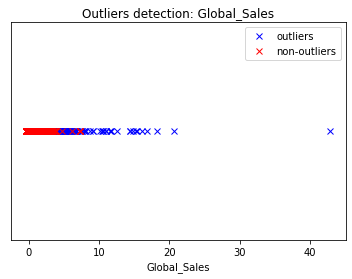

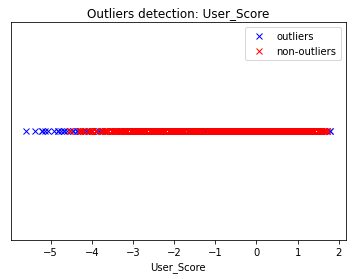

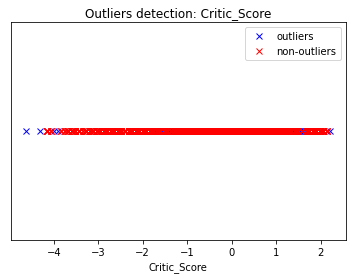

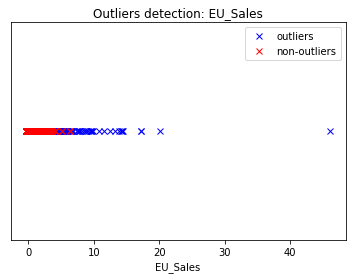

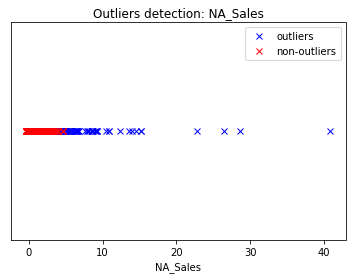

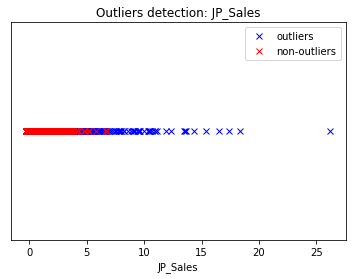

In [29]:
r_percentage = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
k_neighbours = [2, 2, 2, 2, 2, 2]
nearest_neighbours_columns = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
outliers_for_each_column = []
for index, column in enumerate(nearest_neighbours_columns):
    outliers, non_outliers = find_outliers_in_single_column(data, column, k_neighbours[index], r_percentage[index])
    outliers_for_each_column.append(outliers)
    plot_1d_data_with_outliers(outliers, non_outliers, column)
    pretty_print_1d_outliers(outliers, column)

### Clustering 1D (K-means)

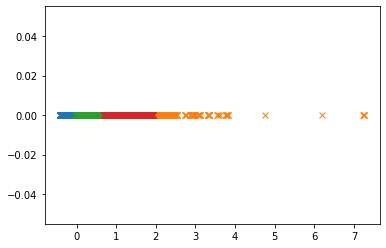

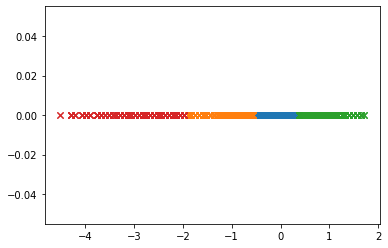

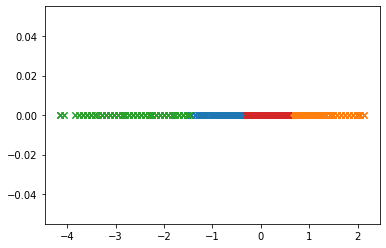

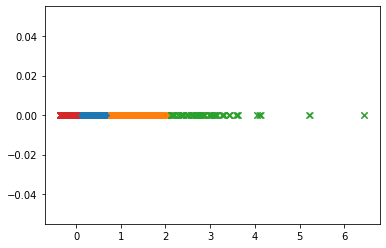

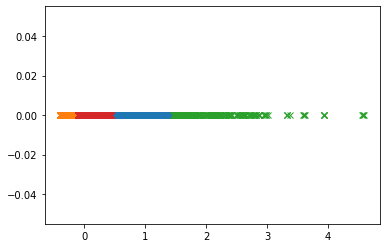

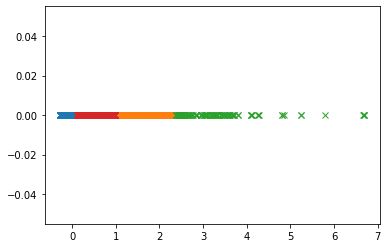

In [30]:
numbers_of_clusters = [4, 4, 4, 4, 4, 4]
k_means_columns = ["Global_Sales", "User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales"]
for index, column in enumerate(k_means_columns):
    data_without_outliers = drop_outliers_from_dataset(data, outliers_for_each_column[index])
    clusters = k_means_1d_clustering(data_without_outliers, column, numbers_of_clusters[index])
    plt.figure()
    for cluster in clusters:
        plt.plot(cluster[column], np.zeros_like(cluster[column]), 'x')

### Outliers - 2D
 - global sales vs critic score
 - global sales vs user score
 - user score vs critic score

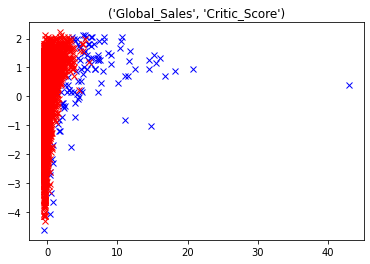

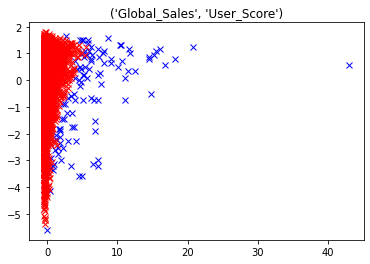

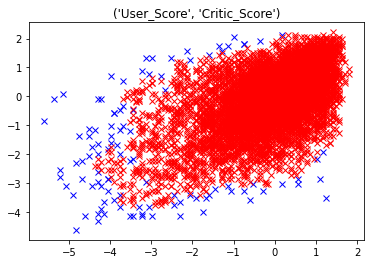

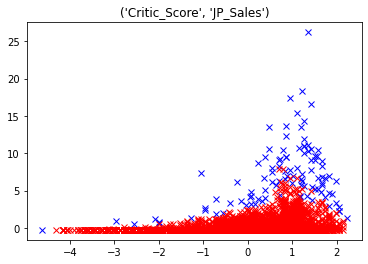

In [56]:
k_neighbours = 5
r_percentage = 0.01
nearest_neighbours_columns = [("Global_Sales", "Critic_Score"),
                              ("Global_Sales", "User_Score"),
                              ("User_Score", "Critic_Score"),
                              ("Critic_Score", "JP_Sales")]
outliers_for_each_pair = []
for column_pair in nearest_neighbours_columns:
    outliers, non_outliers = find_outliers_in_two_columns(data, column_pair, k_neighbours, r_percentage)
    outliers_for_each_pair.append(outliers)

    plt.figure()
    plt.plot(outliers[column_pair[0]], outliers[column_pair[1]], 'x', c='b')
    plt.plot(non_outliers[column_pair[0]], non_outliers[column_pair[1]], 'x', c='r')
    plt.title(column_pair)

### Clustering 2D (K-means)

C:\Users\arkad\.conda\envs\Pandas_training\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


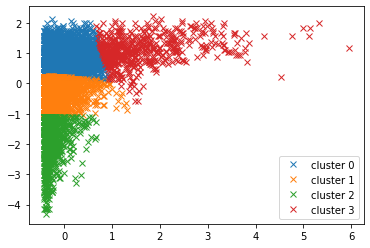

<Figure size 432x288 with 0 Axes>

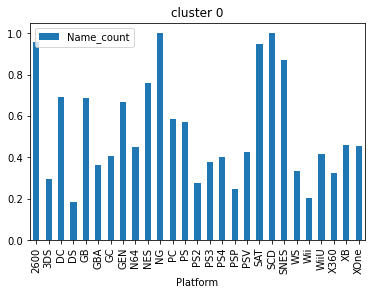

<Figure size 432x288 with 0 Axes>

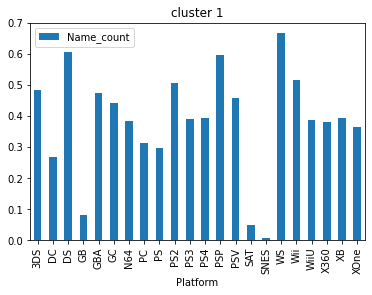

<Figure size 432x288 with 0 Axes>

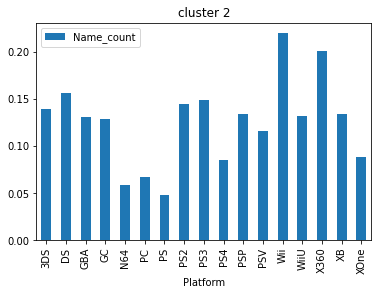

<Figure size 432x288 with 0 Axes>

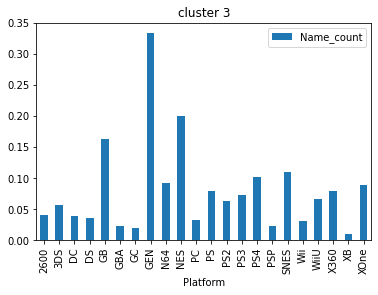

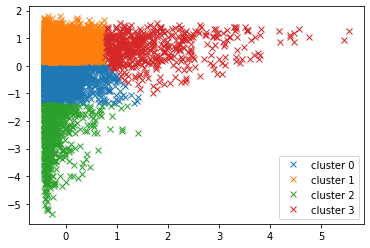

<Figure size 432x288 with 0 Axes>

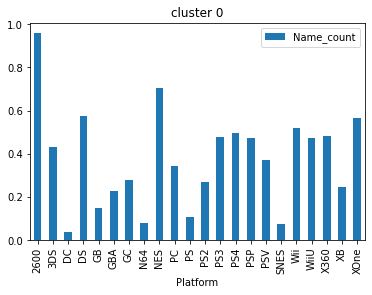

<Figure size 432x288 with 0 Axes>

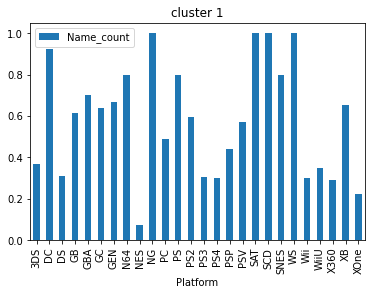

<Figure size 432x288 with 0 Axes>

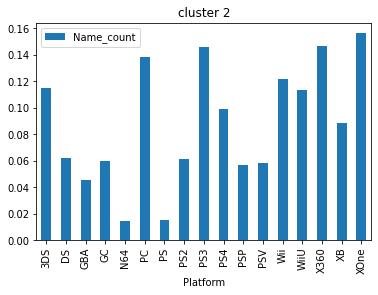

<Figure size 432x288 with 0 Axes>

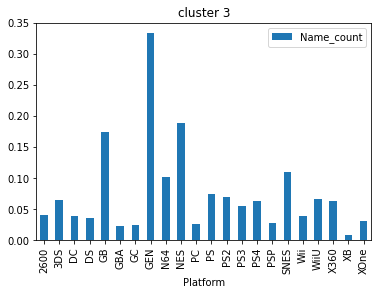

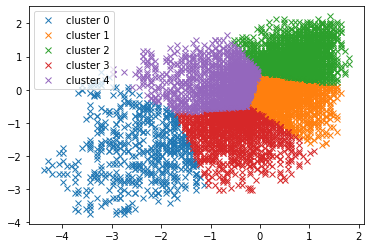

<Figure size 432x288 with 0 Axes>

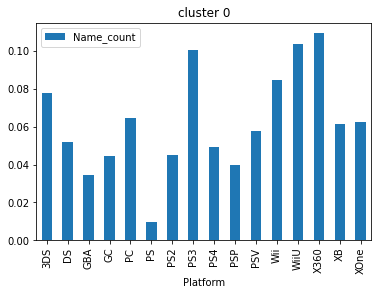

<Figure size 432x288 with 0 Axes>

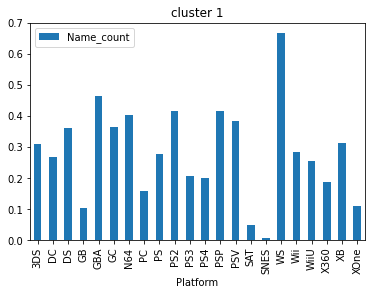

<Figure size 432x288 with 0 Axes>

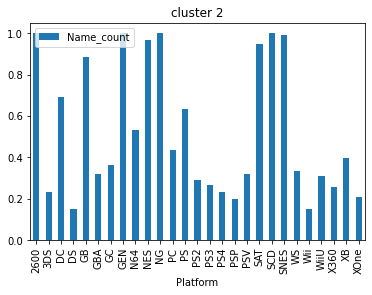

<Figure size 432x288 with 0 Axes>

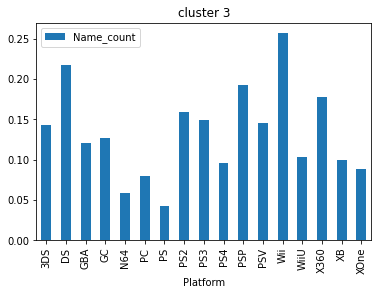

<Figure size 432x288 with 0 Axes>

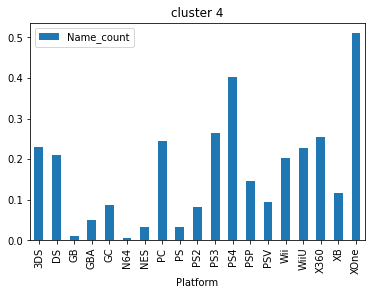

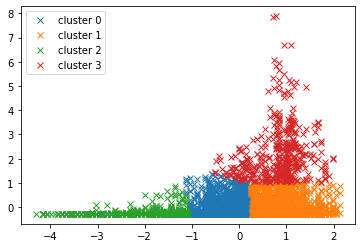

<Figure size 432x288 with 0 Axes>

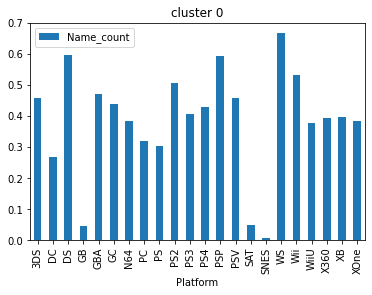

<Figure size 432x288 with 0 Axes>

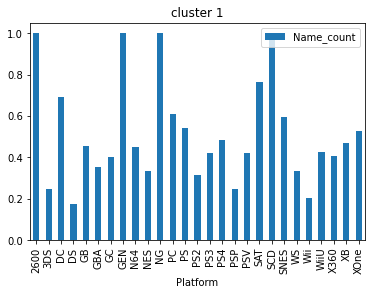

<Figure size 432x288 with 0 Axes>

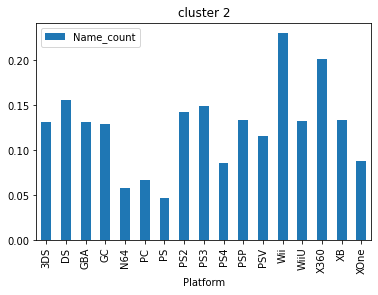

<Figure size 432x288 with 0 Axes>

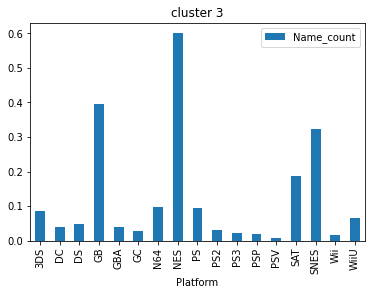

In [57]:
column_to_analyze = "Platform"
numbers_of_clusters = [4, 4, 5, 4]
k_means_columns = [("Global_Sales", "Critic_Score"),
                   ("Global_Sales", "User_Score"),
                   ("User_Score", "Critic_Score"),
                   ("Critic_Score", "JP_Sales")]
for index, column_pair in enumerate(k_means_columns):
    data_without_outliers = drop_outliers_from_dataset(data, outliers_for_each_pair[index])
    clusters = k_means_2d_clustering(data_without_outliers, column_pair, numbers_of_clusters[index])
    plot_2d_data_with_clusters(clusters, column_pair)
    for i, cluster in enumerate(clusters):
        plt.figure()
        number_of_entries_by_analyzed = cluster.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
        number_of_entries_by_analyzed.columns = ['_'.join(col).strip() for col in number_of_entries_by_analyzed.columns.values]
        total_number_of_entries_by_analyzed = data.filter([column_to_analyze, "Name"]).groupby([column_to_analyze]).agg(["count"])
        total_number_of_entries_by_analyzed.columns = ['_'.join(col).strip() for col in total_number_of_entries_by_analyzed.columns.values]
        number_of_entries_by_analyzed["Name_count"] = number_of_entries_by_analyzed["Name_count"] / total_number_of_entries_by_analyzed["Name_count"]
        number_of_entries_by_analyzed.plot.bar(y="Name_count")
        plt.title("cluster {}".format(i))